# Basic tutorial of the lgpr package
Here we generate an artificial longitudinal data set and analyse it.

In [2]:
require(lgpr)
require(repr)
require(ggplot2)

## 1. Simulating data
In this example we generate a data set with 16 individuals and 6 measurement time points for each. 

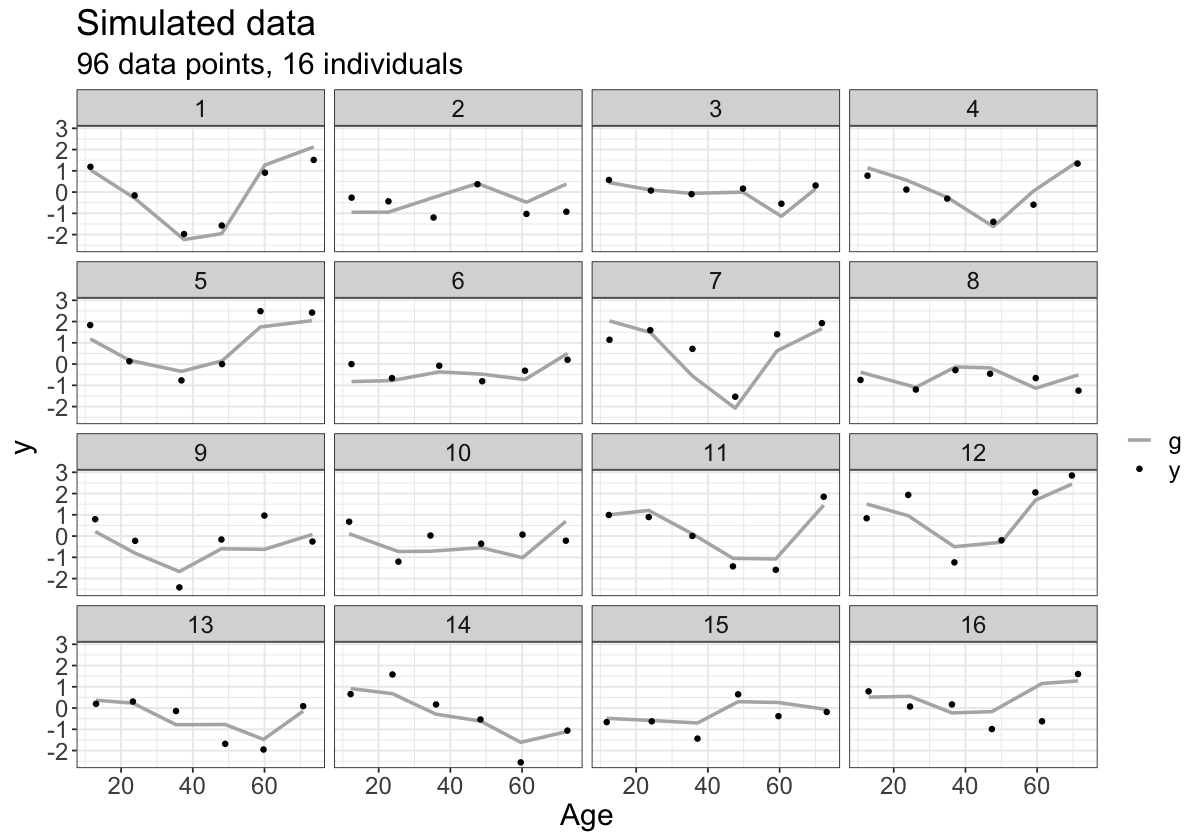

In [5]:
set.seed(123)
simData <- simulate_data(N           = 16,
                        t_data       = seq(12, 72, by = 12),
                        covariates   = c(    2,2),
                        lengthscales = c(12,24,12,12),
                        relevances   = c(1,1,1,0),
                        names        = c("sex", "location"),
                        t_jitter     = 1.0)

FONT_SIZE <- 18
options(repr.plot.width=10, repr.plot.height=7)

# plot data for each individual separately
plot_simdata(simData) + theme(text=element_text(size=FONT_SIZE)) 

As can be seen from the following plot, the data was generated so that covariates age, id, and sex are relevant, whereas location is not.

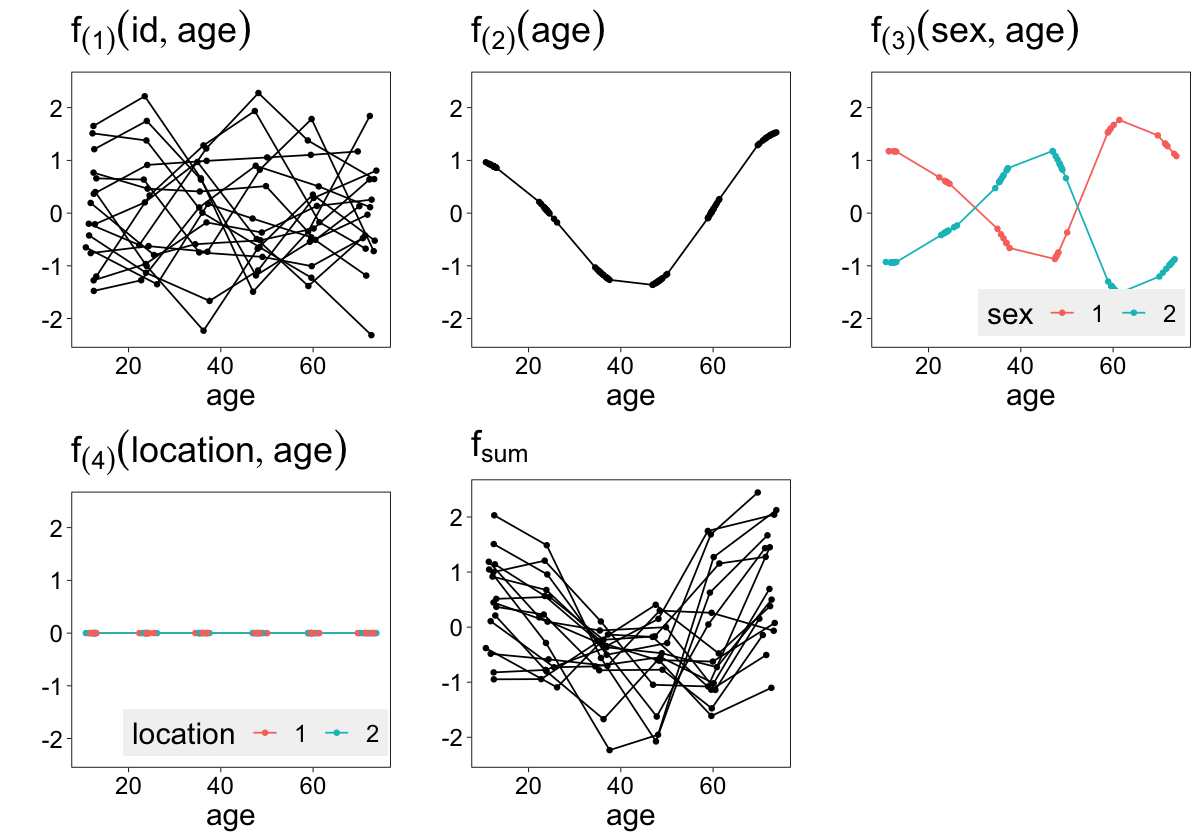

In [6]:
# plot each generated component separately
plot_components_simdata(simData, font_size = FONT_SIZE) 

## 2. Fitting a model
We fit a model with all covariates included. In general, it would be a good idea to use multiple, longer chains (arguments `iter` and `chains`).

In [7]:
fit <- lgp(formula  = y ~ id + age + sex + location,
           data     = simData$data,
           iter     = 2000, 
           chains   = 1,
           refresh  = 0,
           verbose  = TRUE)

* Covariate 'sex' resolved to type 'categorical'.
* Covariate 'location' resolved to type 'categorical'.

 ---------- LGPMODEL SUMMARY ----------

  Model:
    f = f[(1)](id, age) + f[(2)](age) + f[(3)](sex, age) + f[(4)](location, age)
    Response variable: y
    Observation model: Gaussian 
  Variable types:
    - Identifier variable: id
    - Time variable: age
    - Other categorical variables: sex, location
  Observation model: Gaussian

 ---------- PRIOR SPECIFICATIONS ----------

  alpha_id ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_age ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge[1] ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge[2] ~ Student-t(nu=20,mu=0,sigma=1)

  ell_id ~ Log-Normal(0,1.151)
  ell_age ~ Log-Normal(0,1.151)
  ell_categAge[1] ~ Log-Normal(0,1.151)
  ell_categAge[2] ~ Log-Normal(0,1.151)

  (sigma_n)^2 ~ Log-Normal(0,1)

 
* Observation model = 1
* Number of data points = 96
* Number of model components = 4
* Number of individuals = 16
* Additional model in

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


* Begin postprocessing. 
* Computing relevances over 1000 posterior samples.

* The following components explain 99.87% of variance: {noise, f[(2)](age), f[(3)](sex, age), f[(1)](id, age)}.

 ---------- LGPFIT SUMMARY ----------

* Average runtime per chain: 50.02 s (warmup) and 36.9 s (sampling)
* The largest R_hat value (ignoring generated quantities) is 1.046 (sigma_n[1]).
* Proportion of signal = 0.625
* Selection threshold = 0.95

                      Relevance Selected
f[(1)](id, age)           0.116     TRUE
f[(2)](age)               0.259     TRUE
f[(3)](sex, age)          0.248     TRUE
f[(4)](location, age)     0.001    FALSE
noise                     0.375     TRUE



The covariate relevances are reported above. As is seen, the location covariate is not selected and therefore correctly classified as irrelevant.

## 3. Interpreting the results
We can visualize the inferred covariate effects and confirm that the effect of location is very small compared to that of other covariates. Here we compute the posterior distributions of each component ($f_{(j)}$), and the sum of all components ($f_{sum}$) at a dense time grid of 100 points, using MAP hyperparameter estimates. For each component, the shaded ribbons indicate the $95\%$ posterior interval, and the solid lines are the posterior mean.

* Computing predictions using MAP parameters. 


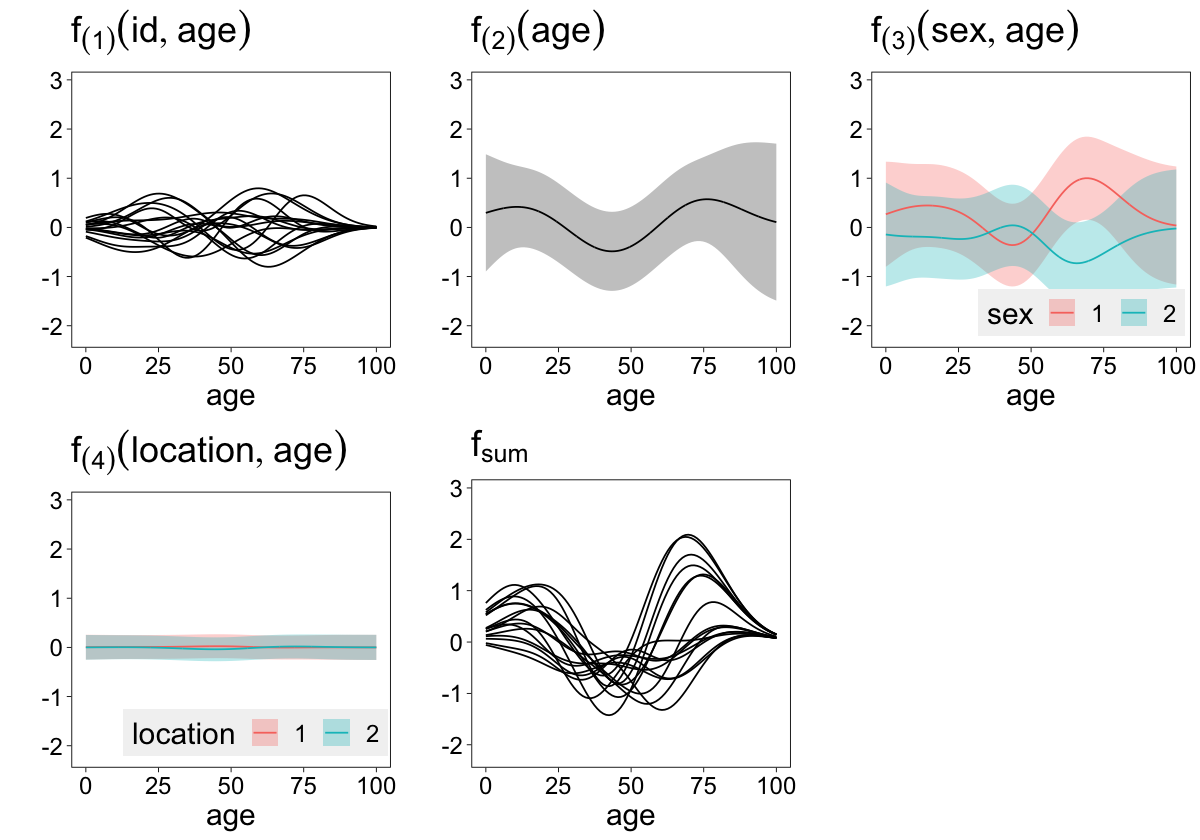

In [18]:
ttt    <- seq(0, 100, length.out = 100)
X_pred <- create_test_points(fit, ttt)
PRED   <- lgp_predict(fit, X_pred, samples = 'map')
p      <- plot_components_posterior(fit, PRED=PRED, font_size = FONT_SIZE)
p

To confirm that the fitted model makes sense, we can plot the posterior predictive distribution of the model, for each individual, along with the data points.

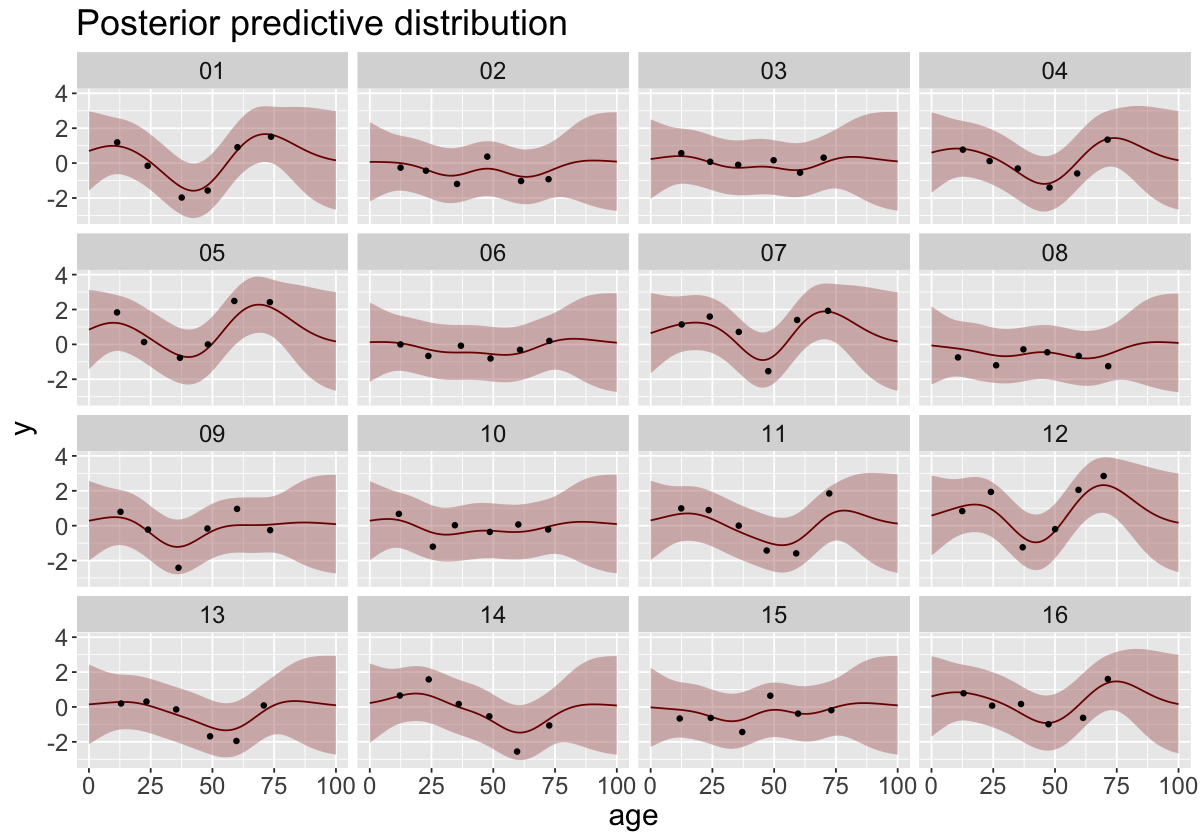

In [19]:
plot_posterior_y(fit, PRED) + theme(text=element_text(size=FONT_SIZE))